# Questão 3

<p align="center">

<img src="img/q3.png">

</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Item 1 - Construa a cadeia de Markov deste processo

In [2]:
def P(p):
    return np.array([[1-p, p, 0, 0, 0, 0, 0, 0, 0, 0], 
                     [1-p, 0, p, 0, 0, 0, 0, 0, 0, 0],
                     [1-p, 0, 0, p, 0, 0, 0, 0, 0, 0],
                     [1-p, 0, 0, 0, p, 0, 0, 0, 0, 0],
                     [1-p, 0, 0, 0, 0, p, 0, 0, 0, 0],
                     [1-p, 0, 0, 0, 0, 0, p, 0, 0, 0],
                     [1-p, 0, 0, 0, 0, 0, 0, p, 0, 0],
                     [1-p, 0, 0, 0, 0, 0, 0, 0, p, 0],
                     [1-p, 0, 0, 0, 0, 0, 0, 0, 0, p],
                     [1-p, 0, 0, 0, 0, 0, 0, 0, 0, p]])

## Item 2 - Determine numericamente o vão espectral da cadeia de Markov

In [3]:
def spectral_gap(P):
    eigenvalues = np.linalg.eigvals(P.T)
    eigenvalues = np.sort(eigenvalues)
    return 1 - np.abs(eigenvalues[-2])

print("p = 0.25, Vão Espectral: ",spectral_gap(P(0.25)))
print("p = 0.5, Vão Espectral: ",spectral_gap(P(0.5)))
print("p = 0.75, Vão Espectral: ",spectral_gap(P(0.75)))

p = 0.25, Vão Espectral:  0.995098269164335
p = 0.5, Vão Espectral:  0.9913481641811251
p = 0.75, Vão Espectral:  0.988177094071795


## Item 3 - Determine numericamente a distribuição estacionária

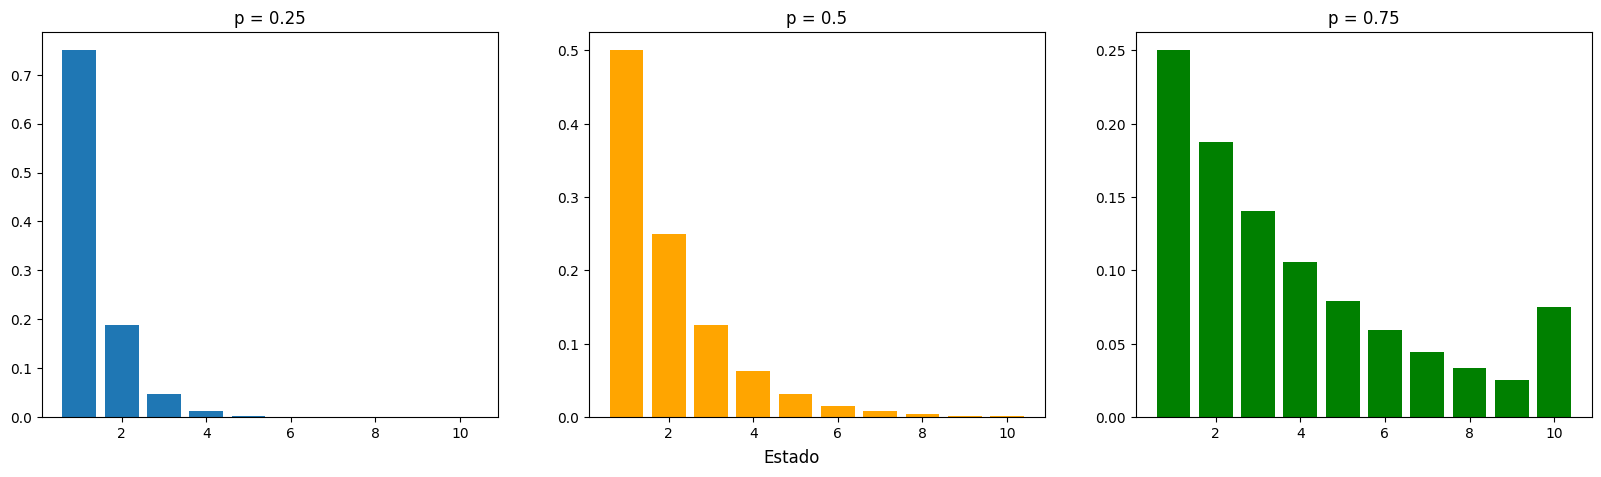

In [25]:
def stationary_distribution(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    eigenvectors = eigenvectors[:, np.isclose(eigenvalues, 1)]
    stationary = eigenvectors / eigenvectors.sum()
    return stationary[:, 0]

fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].bar(np.arange(1, 11), stationary_distribution(P(0.25)))
ax[1].bar(np.arange(1, 11), stationary_distribution(P(0.5)), color='orange')
ax[2].bar(np.arange(1, 11), stationary_distribution(P(0.75)), color='green')

ax[0].set_title("p = 0.25")
ax[1].set_title("p = 0.5")
ax[2].set_title("p = 0.75")

fig.supxlabel('Estado')
plt.show()
